In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import the data
data = pd.read_csv('./ML Final Project/BMI/Data/data.csv')
print(data.shape)
data.head()

(4206, 5)


,Unnamed: 0,bmi,gender,is_training,name
0,0,34.207396,Male,1,img_0.bmp
1,1,26.453720,Male,1,img_1.bmp
2,2,34.967561,Female,1,img_2.bmp
3,3,22.044766,Female,1,img_3.bmp
4,4,37.758789,Female,1,img_4.bmp


## BMI Distribution

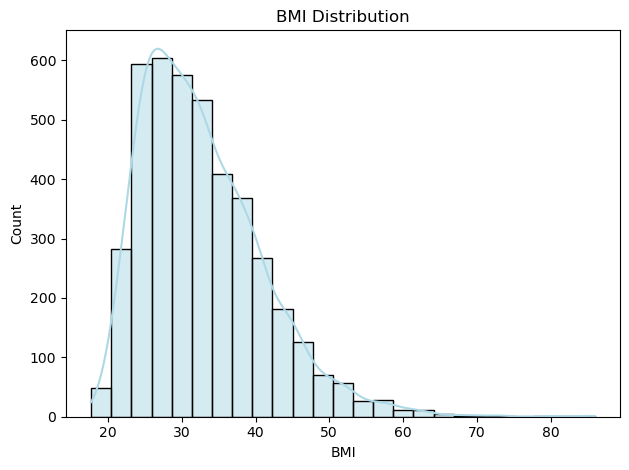

In [3]:
# Plot the histogram of BMI distribution
sns.histplot(data.bmi, bins=25, kde=True, color='lightblue')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## BMI Distribution by Gender

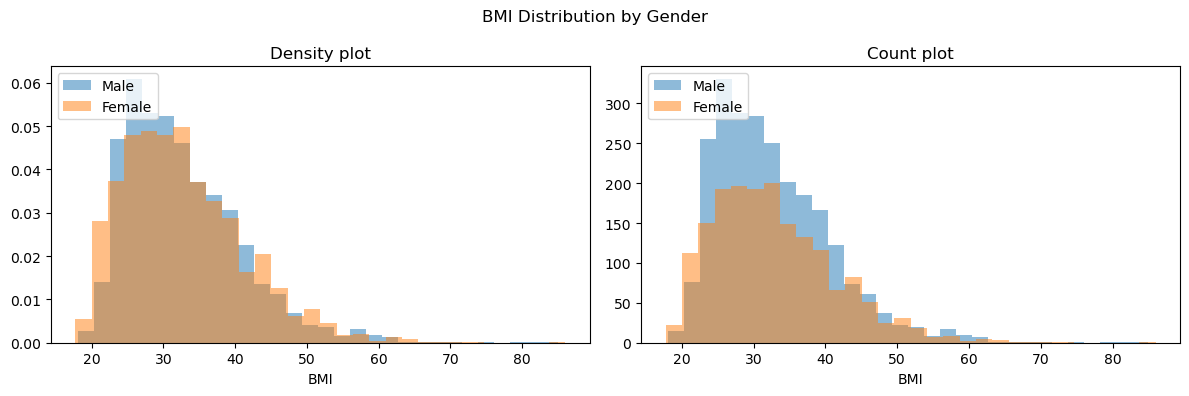

In [4]:
fig, ax = plt.subplots(1, 2, sharex=True)
fig.set_size_inches(12, 4)
options = {'Density plot': True, 'Count plot': False}

for i, (title, normed) in enumerate(options.items()):
    for sex in ['Male', 'Female']:
        ax[i].hist(data.loc[(data.gender == sex) & (~data.bmi.isnull()), 'bmi'].values, label=sex, alpha=0.5,
                   bins=30, density=normed)
        ax[i].set_title(title)
        ax[i].set_xlabel('BMI')
        ax[i].legend(loc='upper left')

plt.suptitle('BMI Distribution by Gender')
plt.tight_layout()
plt.show()

## Gender Count Plot

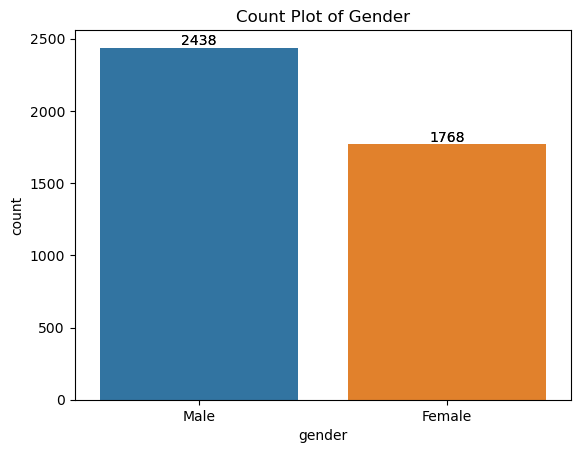

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='gender')
plt.title('Count Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
# Add count labels on top of each bar
for p in sns.countplot(data=data, x='gender').patches:
    count = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, count, count, ha='center', va='bottom')

plt.show()

plt.show()


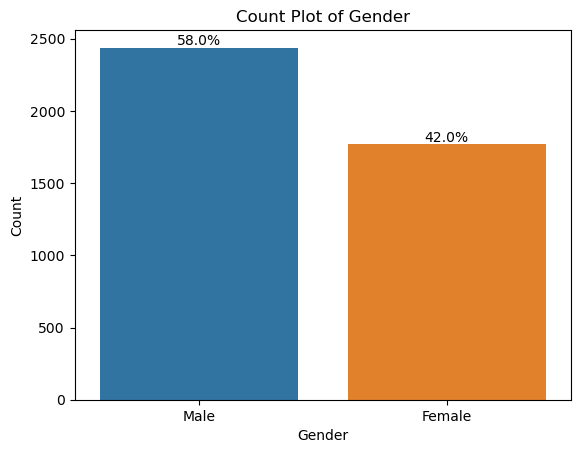

In [14]:
gender_counts = data['gender'].value_counts(normalize=True) * 100

sns.countplot(data=data, x='gender')
plt.title('Count Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

total_count = len(data['gender'])
for i, count in enumerate(data['gender'].value_counts()):
    percentage = (count / total_count) * 100
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

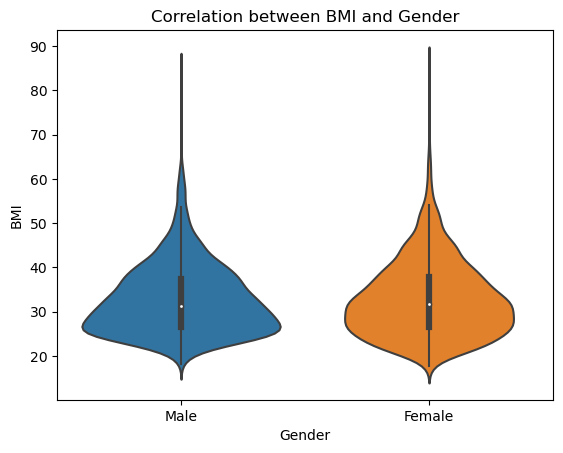

In [18]:
sns.violinplot(data=data, x='gender', y='bmi')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.title('Correlation between BMI and Gender')
plt.show()

## Train/Test Split

In [ ]:
# split the data into train and test set
train_data = data[data['is_training'] == 1]
test_data = data[data['is_training'] == 0]

print('train data dimension: {}'.format(str(train_data.shape)))
print('test data dimension:  {}'.format(str(test_data.shape)))

# output to csv files
train_data.to_csv('./ML Final Project/BMI/Data/train.csv', index = False)
test_data.to_csv('./ML Final Project/BMI/Data/test.csv', index = False)